In [15]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

In [16]:
X,y = datasets.make_moons(200, noise= 0.15)

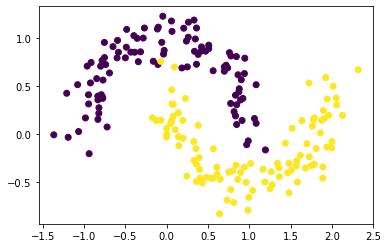

In [17]:
plt.scatter(X[:,0],X[:,1],c = y)

In [18]:
input_neurons = 2
output_neurons = 2
samples = len(X)
learning_rate = 0.001
lambda_reg = 0.01

In [19]:
#model_dict ={'W1': W1, 'B1': b1, 'W2': W2, 'B2': B2}

In [20]:
model_dict = None

In [30]:
def retrieve(model_dict):
    W1 = model_dict['W1']
    W2 = model_dict['W2']    
    B1 = model_dict['B1']
    B2 = model_dict['B2']
    return W1, B1, W2, B2

In [34]:
def forward(x, model_dict):
    W1, B1, W2, B2 = retrieve(model_dict)
    Z1 = X.dot(W1)+ B1 #suma wejść od neuronów
    A1 = np.tanh(Z1)   #funkcja aktywacji
    Z2 = A1.dot(W2)+ B2#suma wejść od neuronów
    #A2 = np.tanh(Z2)   #funkcja aktywacji - o jedną za duzo
    #Softmax Activation function - łączy się z Cross Entropy Loss
    exp_scores = np.exp(Z2) # wszystkie wartości wrzucamy do potęgi e
    softmax = exp_scores / np.sum(exp_scores, axis= 1, keepdims=True) #dzielimy przez sumę (aby sumowało się do 1)
    return Z1, A1, softmax

In [42]:
def loss(softmax, y, model_dict):
    #Cross entropy loss
    W1, B1, W2, B2 = retrieve(model_dict)
    m = np.zeros(200)
    for i,correct_index in enumerate(y):
        predicted = softmax[i][correct_index]
        m[i]= -np.log(predicted) #liczymy wartość pojedynczego składnika
    
    #każdy element powinien być policzony, gdyż każdy element jest przydzielony do jednego zbioru 
    #(y = 0 również oznacza przynależność)
    softmax_loss = np.sum(m)
    
    #weight decay - obniżanie wag z każdym cyklem uczenia / regularization
    reg_loss = lambda_reg / 2* (np.sum(np.square(W1))+ np.sum(np.square(W2)))
    loss = softmax_loss + reg_loss
    return loss / y.shape[0] #normalizacja wartości funkcji błędu

In [55]:
def prediction(model_dict, x):
    W1, B1, W2, B2 = retrieve(model_dict)
    Z1 = X.dot(W1)+ B1 #suma wejść od neuronów
    A1 = np.tanh(Z1)   #funkcja aktywacji
    Z2 = A1.dot(W2)+ B2#suma wejść od neuronów
    #A2 = np.tanh(Z2)   #funkcja aktywacji
    #Softmax Activation function - łączy się z Cross Entropy Loss
    exp_scores = np.exp(Z2) # wszystkie wartości wrzucamy do potęgi e
    softmax = exp_scores / np.sum(exp_scores, axis= 1, keepdims=True) #dzielimy przez sumę (aby sumowało się do 1)
    return np.argmax(softmax, axis = 1)

In [51]:
def backpropagation(x, y, model_dict, epochs):
    for i in range(epochs):
        W1, B1, W2, B2 = retrieve(model_dict)
        Z1, A1, probs = forward(x, model_dict)
        
        delta3 = np.copy(probs)
        delta3[range(x.shape[0]), y] -= 1  #delta3 = probs - 1 tylko dla wartości, które są przewidywane
        dW2 = (A1.T).dot(delta3)
        dB2 = np.sum(delta3,axis=0, keepdims= True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(np.tanh(Z1),2))
        dW1 = (x.T).dot(delta2)
        dB1 = np.sum(delta2,axis=0, keepdims= True)
        #add regularization
        dW2 += lambda_reg * np.sum(W2)
        dW1 += lambda_reg * np.sum(W1)
        #update weights
        W1 += -learning_rate * dW1
        B1 += -learning_rate * dB1
        W2 += -learning_rate * dW2
        B2 += -learning_rate * dB2
        model_dict ={'W1': W1, 'B1': B1, 'W2': W2, 'B2': B2}
        #print loss every 50 epochs
        if i %50 == 0:
            print("Loss for epoch {}: {:.3f}".format(i,loss(probs,y, model_dict)))
            #print(*probs[:15], sep=', ')
        
    return model_dict

In [80]:
def plot_decision_boundary(pred_func): 
    """
    Code adopted from: https://github.com/dennybritz/nn-from-scratch
    """
    # Set min and max values and give it some padding 
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5 
    h = 0.01 
    pred = prediction(model_dict,X)
    # Generate a grid of points with distance h between them 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
    # Predict the function value for the whole gid 
    #Z = pred_func(np.c_[xx.ravel(), yy.ravel()]) 
    #Z = Z.reshape(X.shape) 
    # Plot the contour and training examples 
    #plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral) 
    plt.scatter(X[:, 0], X[:, 1], c=pred)#, cmap=plt.cm.Spectral) 
    plt.title("Decision Boundary for hidden layer size 3")
    return pred

def backpropagation(x, y, model_dict, epochs):
    for i in range(epochs):
        W1, b1, W2, b2 = retreive(model_dict)
        z1, a1, probs = forward(x, model_dict)    # a1: (200,3), probs: (200,2)
        delta3 = np.copy(probs)
        delta3[range(x.shape[0]), y] -= 1      # (200,2)
        dW2 = (a1.T).dot(delta3)               # (3,2)
        db2 = np.sum(delta3, axis=0, keepdims=True)        # (1,2)
        delta2 = delta3.dot(W2.T) * (1 - np.power(np.tanh(z1), 2))
        dW1 = np.dot(x.T, delta2)
        db1 = np.sum(delta2, axis=0)
        # Add regularization terms
        dW2 += lambda_reg * np.sum(W2)  
        dW1 += lambda_reg * np.sum(W1)  
        # Update Weights: W = W + (-lr*gradient) = W - lr*gradient
        W1 += -learning_rate * dW1
        b1 += -learning_rate * db1
        W2 += -learning_rate * dW2
        b2 += -learning_rate * db2
        # Update the model dictionary
        model_dict = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        # Print the loss every 50 epochs
        if i%50 == 0:
            print("Loss at epoch {} is: {:.3f}".format(i,loss(probs, y, model_dict)))
            
    return model_dict

In [26]:
def init_network(input_dim, hidden_dim, output_dim):
    model = {}
    # Xavier Initialization
    W1 = np.random.randn(input_dim,hidden_dim) / np.sqrt(input_dim)
    B1 = np.zeros((1, hidden_dim))
    W2 = np.random.randn(hidden_dim, output_dim) / np.sqrt(hidden_dim)
    B2 = np.zeros((1, output_dim))
    model['W1'] = W1
    model['B1'] = B1
    model['W2'] = W2
    model['B2'] = B2
    return model

In [62]:
def predict(model_dict, x):
    W1, b1, W2, b2 = retrieve(model_dict)
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    softmax = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)   # (200,2)
    return np.argmax(softmax, axis = 1) 

Loss for epoch 0: 0.673
Loss for epoch 50: 0.281
Loss for epoch 100: 0.274
Loss for epoch 150: 0.270
Loss for epoch 200: 0.264
Loss for epoch 250: 0.257
Loss for epoch 300: 0.246
Loss for epoch 350: 0.230
Loss for epoch 400: 0.210
Loss for epoch 450: 0.188
Loss for epoch 500: 0.167
Loss for epoch 550: 0.149
Loss for epoch 600: 0.134
Loss for epoch 650: 0.122
Loss for epoch 700: 0.111
Loss for epoch 750: 0.103
Loss for epoch 800: 0.096
Loss for epoch 850: 0.090
Loss for epoch 900: 0.085
Loss for epoch 950: 0.080
Loss for epoch 1000: 0.076
Loss for epoch 1050: 0.073
Loss for epoch 1100: 0.070
Loss for epoch 1150: 0.067
Loss for epoch 1200: 0.064
Loss for epoch 1250: 0.062
Loss for epoch 1300: 0.060
Loss for epoch 1350: 0.058
Loss for epoch 1400: 0.057
Loss for epoch 1450: 0.055


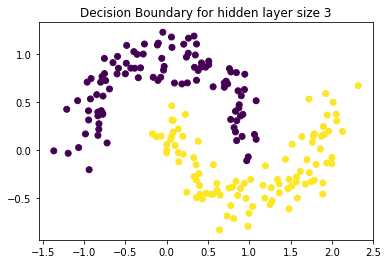

In [81]:
model_dict = init_network(input_dim= input_neurons, hidden_dim= 20, output_dim= output_neurons)
model = backpropagation(X, y, model_dict, 1500)
pred = plot_decision_boundary(lambda x: predict(model_dict,X))

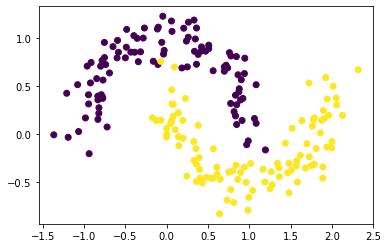

In [72]:
plt.scatter(X[:,0],X[:,1],c = y)

In [84]:
result = np.sum((pred == y))
print(pred)
print(y)

[0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1
 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1
 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0
 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0
 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0]
[0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0
 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1
 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1
 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0
 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0
 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0]


In [85]:
print(result)

197
